In [15]:
import numpy as np
import pandas as pd
df = pd.read_excel('data/train.xlsx')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,9117000170,20150505T000000,268643,4,2.25,1810,9240,2.0,0,0,...,7,1810,0,1961,0,98055,47.4362,-122.187,1660,9240
1,6700390210,20140708T000000,245000,3,2.50,1600,2788,2.0,0,0,...,7,1600,0,1992,0,98031,47.4034,-122.187,1720,3605
2,7212660540,20150115T000000,200000,4,2.50,1720,8638,2.0,0,0,...,8,1720,0,1994,0,98003,47.2704,-122.313,1870,7455
3,8562780200,20150427T000000,352499,2,2.25,1240,705,2.0,0,0,...,7,1150,90,2009,0,98027,47.5321,-122.073,1240,750
4,7760400350,20141205T000000,232000,3,2.00,1280,13356,1.0,0,0,...,7,1280,0,1994,0,98042,47.3715,-122.074,1590,8071


In [16]:
df["date"] = pd.to_datetime(df["date"])
                            
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

df["effective_year"] = df[["yr_renovated", "yr_built"]].max(axis=1)

df.drop(columns = ['id' ,'date' , 'yr_renovated' , 'yr_built'] , inplace =True)

In [18]:
df1 = pd.read_excel('data/test.xlsx')

df1["date"] = pd.to_datetime(df1["date"])

df1["year"] = df1["date"].dt.year
df1["month"] = df1["date"].dt.month

df1["effective_year"] = df1[["yr_renovated", "yr_built"]].max(axis=1)

df1.drop(columns = ['id' ,'date' , 'yr_renovated' , 'yr_built'] , inplace =True)

In [19]:
df1.to_csv("data/test_clean.csv", index=False)

In [20]:
                                                                    #EDA

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/train_clean.csv')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,effective_year
0,268643,4,2.25,1810,9240,2.0,0,0,3,7,1810,0,98055,47.4362,-122.187,1660,9240,2015,5,1961
1,245000,3,2.50,1600,2788,2.0,0,0,4,7,1600,0,98031,47.4034,-122.187,1720,3605,2014,7,1992
2,200000,4,2.50,1720,8638,2.0,0,0,3,8,1720,0,98003,47.2704,-122.313,1870,7455,2015,1,1994
3,352499,2,2.25,1240,705,2.0,0,0,3,7,1150,90,98027,47.5321,-122.073,1240,750,2015,4,2009
4,232000,3,2.00,1280,13356,1.0,0,0,3,7,1280,0,98042,47.3715,-122.074,1590,8071,2014,12,1994


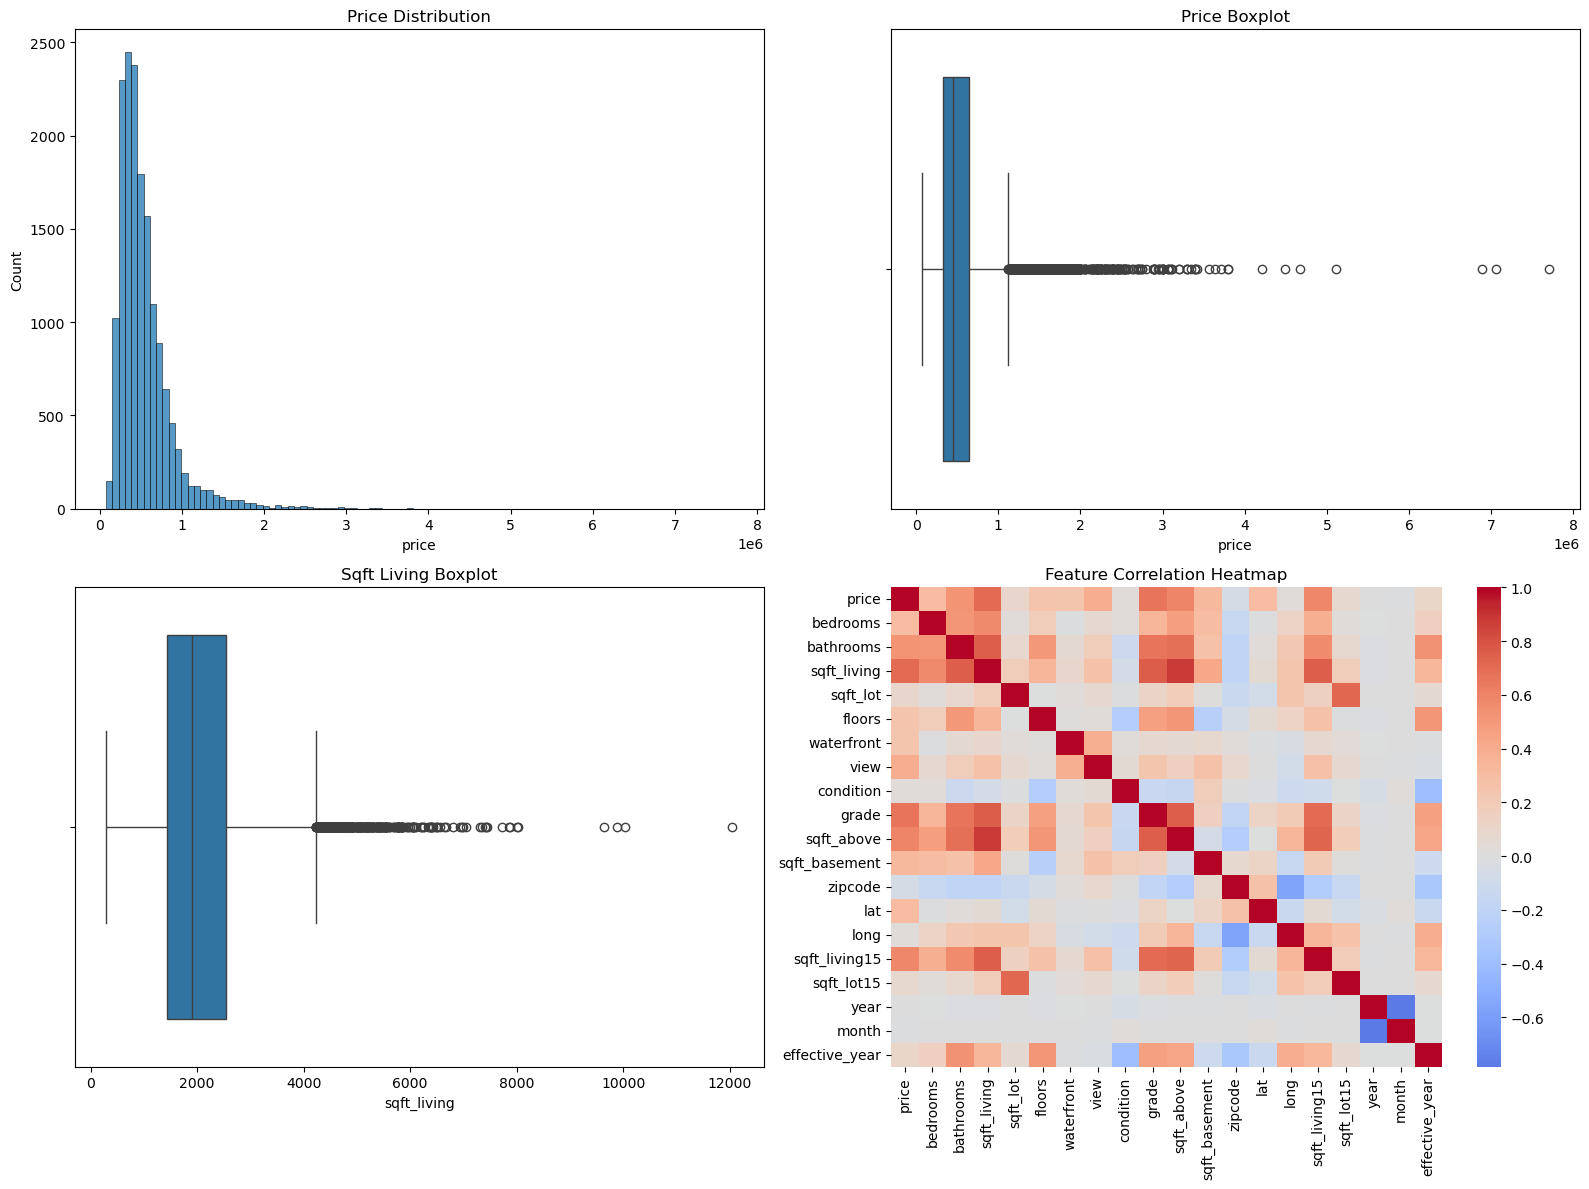

In [26]:


fig, axes = plt.subplots(2, 2, figsize=(16, 12))


sns.histplot(df["price"], bins=100, ax=axes[0, 0])
axes[0, 0].set_title("Price Distribution")


sns.boxplot(x=df["price"], ax=axes[0, 1])
axes[0, 1].set_title("Price Boxplot")


sns.boxplot(x=df["sqft_living"], ax=axes[1, 0])
axes[1, 0].set_title("Sqft Living Boxplot")


sns.heatmap(df.corr(), cmap="coolwarm", center=0, ax=axes[1, 1])
axes[1, 1].set_title("Feature Correlation Heatmap")

plt.tight_layout()
plt.show()


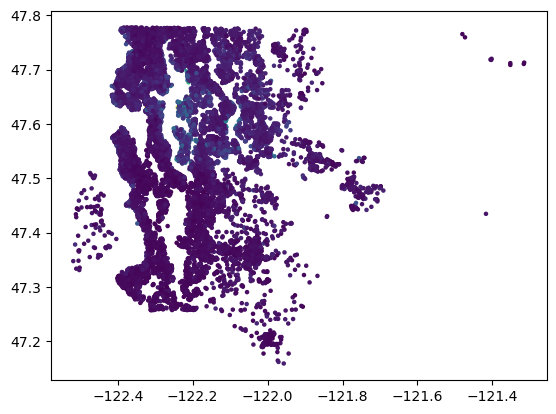

In [27]:
plt.scatter(df["long"], df["lat"], c=df["price"], s=5)

In [ ]:
                                                        #CNN Features

In [34]:
import tensorflow as tf
import pandas as pd
import numpy as np

from tensorflow.keras.models import load_model, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
def r2_metric(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    ss_res = tf.reduce_sum(tf.square(y_true - y_pred))
    ss_tot = tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))

    return 1 - ss_res / (ss_tot + tf.keras.backend.epsilon())

model = load_model(
    "dependables/cnn_image_model.keras",
    custom_objects={"r2_metric": r2_metric}
)

print("Model loaded successfully")
model.summary()


Model loaded successfully


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_21 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 280,133 (1.07 MB)

 Trainable params: 93,377 (364.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 186,756 (729.52 KB)

In [36]:
inputs = tf.keras.Input(shape=(224, 224, 3))

x = inputs
for layer in model.layers[:-1]:  
    x = layer(x)

feature_extractor = Model(inputs=inputs, outputs=x)


df = pd.read_csv("data/train_clean.csv")

df["imageid"] = df.index.astype(str).str.zfill(5) + ".jpg"

print("Rows:", len(df))
print(df.head())


Rows: 16209
    price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  268643         4       2.25         1810      9240     2.0           0   
1  245000         3       2.50         1600      2788     2.0           0   
2  200000         4       2.50         1720      8638     2.0           0   
3  352499         2       2.25         1240       705     2.0           0   
4  232000         3       2.00         1280     13356     1.0           0   

   view  condition  grade  ...  sqft_basement  zipcode      lat     long  \
0     0          3      7  ...              0    98055  47.4362 -122.187   
1     0          4      7  ...              0    98031  47.4034 -122.187   
2     0          3      8  ...              0    98003  47.2704 -122.313   
3     0          3      7  ...             90    98027  47.5321 -122.073   
4     0          3      7  ...              0    98042  47.3715 -122.074   

   sqft_living15  sqft_lot15  year  month  effective_year    imageid

In [37]:
datagen = ImageDataGenerator(rescale=1.0 / 255.0)

img_gen = datagen.flow_from_dataframe(
    dataframe=df,
    directory="satellite_images/",
    x_col="imageid",
    y_col=None,
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,
    shuffle=False
)

image_features = feature_extractor.predict(
    img_gen,
    verbose=1
)

print("Feature shape:", image_features.shape)

feature_cols = [f"cnn_{i}" for i in range(image_features.shape[1])]
cnn_df = pd.DataFrame(image_features, columns=feature_cols)

print(cnn_df.head())


Found 16209 validated image filenames.
507/507 ━━━━━━━━━━━━━━━━━━━━ 61s 120ms/step
Feature shape: (16209, 128)
      cnn_0     cnn_1     cnn_2     cnn_3     cnn_4     cnn_5     cnn_6  \
0  0.001218  0.001916  0.000370  0.000685  0.011689  0.009129  0.008849   
1  0.001907  0.001827  0.000255  0.000728  0.017242  0.011478  0.006831   
2  0.000278  0.000788  0.000255  0.000271  0.010750  0.008563  0.004154   
3  0.000766  0.006250  0.000059  0.000353  0.011041  0.007629  0.011524   
4  0.001788  0.002063  0.000097  0.000314  0.007693  0.009840  0.008206   

      cnn_7         cnn_8  cnn_9  ...   cnn_118   cnn_119       cnn_120  \
0  0.002366  3.894217e-06    0.0  ...  0.000028  0.000043  7.063262e-07   
1  0.003149  3.002715e-06    0.0  ...  0.000171  0.000112  1.084903e-06   
2  0.001471  8.630178e-07    0.0  ...  0.000106  0.000489  0.000000e+00   
3  0.001680  0.000000e+00    0.0  ...  0.000230  0.000027  0.000000e+00   
4  0.002596  7.573954e-07    0.0  ...  0.000231  0.000888  2.10